In [2]:
import pandas as pd

df_alphafold = pd.read_csv('/home/ssahin/Desktop/temp_90ligand/temp_alphafold/final_df_alphafold.csv')
df_pdb = pd.read_csv('/home/ssahin/Desktop/temp_90ligand/temp_expPDB/final_df_pdb.csv')

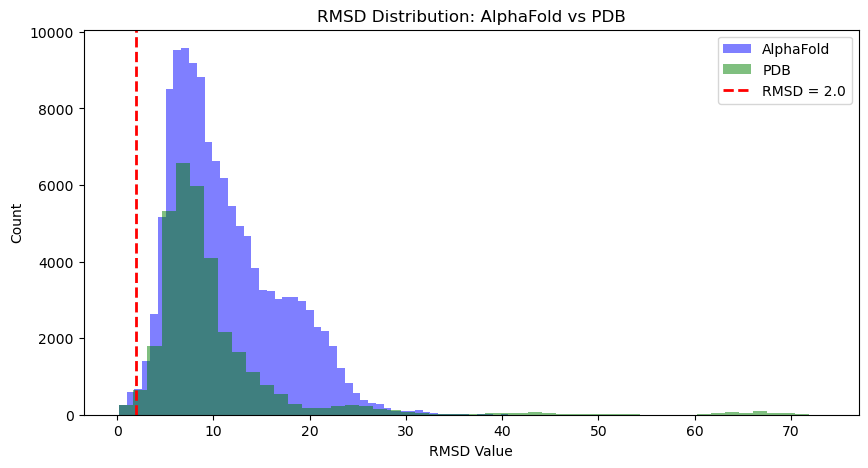

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_alphafold['RMSD'].dropna(), bins=50, alpha=0.5, label='AlphaFold', color='blue')
plt.hist(df_pdb['RMSD'].dropna(), bins=50, alpha=0.5, label='PDB', color='green')
plt.axvline(x=2.0, color='red', linestyle='--', linewidth=2, label='RMSD = 2.0')
plt.xlabel('RMSD Value')
plt.ylabel('Count')
plt.title('RMSD Distribution: AlphaFold vs PDB')
plt.legend()
plt.show()

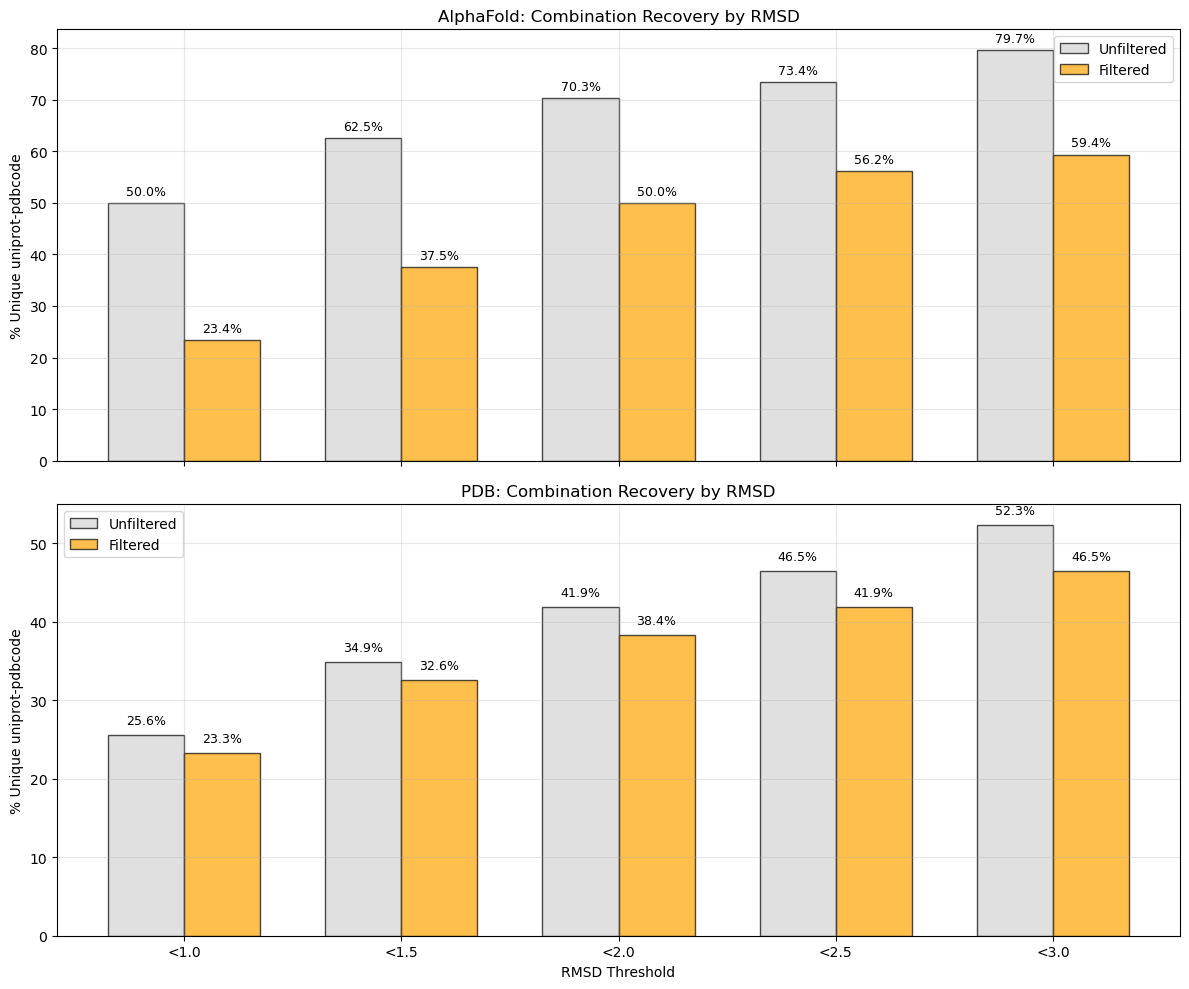

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Filtre fonksiyonu
def tool_specific_filter(row):
    if row['Tool1'] == 'SMINA' and row['Score1'] <= -7:
        return True
    if row['Tool1'] == 'LeDock' and row['Score1'] <= -5:
        return True
    if row['Tool1'] == 'GOLD' and row['Score1'] >= 70:
        return True
    if row['Tool2'] == 'SMINA' and row['Score2'] <= -7:
        return True
    if row['Tool2'] == 'LeDock' and row['Score2'] <= -5:
        return True
    if row['Tool2'] == 'GOLD' and row['Score2'] >= 70:
        return True
    return False

thresholds = [1.0, 1.5, 2.0, 2.5, 3.0]

def get_percentages(df):
    filtered_df = df[df.apply(tool_specific_filter, axis=1)].copy()
    rmsd_col = 'RMSD'
    def unique_combos(df, threshold):
        return df[df[rmsd_col] < threshold][['uniprot', 'pdbcode']].drop_duplicates().shape[0]
    total_combos = df[['uniprot', 'pdbcode']].drop_duplicates().shape[0]
    unique_combos_unfiltered = [unique_combos(df, t) for t in thresholds]
    percentage_unfiltered = [v / total_combos * 100 for v in unique_combos_unfiltered]
    unique_combos_filtered = [unique_combos(filtered_df, t) for t in thresholds]
    percentage_filtered = [v / total_combos * 100 for v in unique_combos_filtered]
    return percentage_unfiltered, percentage_filtered

# Yüzdelikleri hesapla
perc_unf_alphafold, perc_filt_alphafold = get_percentages(df_alphafold)
perc_unf_pdb, perc_filt_pdb = get_percentages(df_pdb)

x_pos = np.arange(len(thresholds))
width = 0.35

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# AlphaFold bar plot
bars1 = axes[0].bar(x_pos - width/2, perc_unf_alphafold, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[0].bar(x_pos + width/2, perc_filt_alphafold, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[0].set_ylabel('% Unique uniprot-pdbcode')
axes[0].set_title('AlphaFold: Combination Recovery by RMSD')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
for bar, value in zip(bars1, perc_unf_alphafold):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
for bar, value in zip(bars2, perc_filt_alphafold):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

# PDB bar plot
bars1 = axes[1].bar(x_pos - width/2, perc_unf_pdb, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[1].bar(x_pos + width/2, perc_filt_pdb, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[1].set_xlabel('RMSD Threshold')
axes[1].set_ylabel('% Unique uniprot-pdbcode')
axes[1].set_title('PDB: Combination Recovery by RMSD')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'<{t}' for t in thresholds])
axes[1].legend()
axes[1].grid(True, alpha=0.3)
for bar, value in zip(bars1, perc_unf_pdb):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
for bar, value in zip(bars2, perc_filt_pdb):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [6]:
# SMINA: highest (least negative) Score1 or Score2
worst_smina = df_alphafold[
    ((df_alphafold['Tool1'] == 'SMINA') | (df_alphafold['Tool2'] == 'SMINA'))
].sort_values(['Score1', 'Score2'], ascending=False).head(1)

# LeDock: highest (least negative) Score1 or Score2
worst_ledock = df_alphafold[
    ((df_alphafold['Tool1'] == 'LeDock') | (df_alphafold['Tool2'] == 'LeDock'))
].sort_values(['Score1', 'Score2'], ascending=False).head(1)

# GOLD: lowest Score1 or Score2
worst_gold = df_alphafold[
    ((df_alphafold['Tool1'] == 'GOLD') | (df_alphafold['Tool2'] == 'GOLD'))
].sort_values(['Score1', 'Score2'], ascending=True).head(1)

print("Worst SMINA dock (highest score):")
print(worst_smina)
print("\nWorst LeDock dock (highest score):")
print(worst_ledock)
print("\nWorst GOLD dock (lowest score):")
print(worst_gold)

Worst SMINA dock (highest score):
Empty DataFrame
Columns: [Tool1, Tool2, PoseNumber1, PoseNumber2, Score1, Score2, File1, File2, RMSD, uniprot, pocket_number, pdbcode]
Index: []

Worst LeDock dock (highest score):
        Tool1 Tool2  PoseNumber1  PoseNumber2  Score1  Score2           File1  \
97380  LeDock  GOLD           18           11   -1.68    37.4  complex_18.pdb   

                File2       RMSD uniprot pocket_number  pdbcode  
97380  complex_11.pdb  21.260827  P39086           NDZ        1  

Worst GOLD dock (lowest score):
       Tool1  Tool2  PoseNumber1  PoseNumber2  Score1  Score2          File1  \
102679  GOLD  Smina            2            1 -192.95 -9.4855  complex_2.pdb   

                File2      RMSD uniprot pocket_number  pdbcode  
102679  complex_1.pdb  9.564596  O14757           ucn        2  


In [7]:
# SMINA: lowest (most negative) Score1 or Score2
best_smina = df_alphafold[
    ((df_alphafold['Tool1'] == 'SMINA') | (df_alphafold['Tool2'] == 'SMINA'))
].sort_values(['Score1', 'Score2'], ascending=True).head(1)

# LeDock: lowest (most negative) Score1 or Score2
best_ledock = df_alphafold[
    ((df_alphafold['Tool1'] == 'LeDock') | (df_alphafold['Tool2'] == 'LeDock'))
].sort_values(['Score1', 'Score2'], ascending=True).head(1)

# GOLD: highest Score1 or Score2
best_gold = df_alphafold[
    ((df_alphafold['Tool1'] == 'GOLD') | (df_alphafold['Tool2'] == 'GOLD'))
].sort_values(['Score1', 'Score2'], ascending=False).head(1)

print("Best SMINA dock (lowest score):")
print(best_smina)
print("\nBest LeDock dock (lowest score):")
print(best_ledock)
print("\nBest GOLD dock (highest score):")
print(best_gold)

Best SMINA dock (lowest score):
Empty DataFrame
Columns: [Tool1, Tool2, PoseNumber1, PoseNumber2, Score1, Score2, File1, File2, RMSD, uniprot, pocket_number, pdbcode]
Index: []

Best LeDock dock (lowest score):
        Tool1  Tool2  PoseNumber1  PoseNumber2  Score1   Score2  \
53793  LeDock  Smina            1            1   -8.68 -9.53639   

               File1          File2      RMSD uniprot pocket_number  pdbcode  
53793  complex_1.pdb  complex_1.pdb  7.080874  P56817           0GH        1  

Best GOLD dock (highest score):
      Tool1  Tool2  PoseNumber1  PoseNumber2  Score1  Score2          File1  \
48028  GOLD  Smina            3           20   88.29 -8.5308  complex_3.pdb   

                File2      RMSD uniprot pocket_number  pdbcode  
48028  complex_20.pdb  6.219427  P37231           C03        4  


In [8]:
# SMINA: lowest (most negative) Score1 or Score2
best_smina_pdb = df_pdb[
    ((df_pdb['Tool1'] == 'SMINA') | (df_pdb['Tool2'] == 'SMINA'))
].sort_values(['Score1', 'Score2'], ascending=True).head(1)

# LeDock: lowest (most negative) Score1 or Score2
best_ledock_pdb = df_pdb[
    ((df_pdb['Tool1'] == 'LeDock') | (df_pdb['Tool2'] == 'LeDock'))
].sort_values(['Score1', 'Score2'], ascending=True).head(1)

# GOLD: highest Score1 or Score2
best_gold_pdb = df_pdb[
    ((df_pdb['Tool1'] == 'GOLD') | (df_pdb['Tool2'] == 'GOLD'))
].sort_values(['Score1', 'Score2'], ascending=False).head(1)

print("Best SMINA dock (lowest score) in PDB:")
print(best_smina_pdb)
print("\nBest LeDock dock (lowest score) in PDB:")
print(best_ledock_pdb)
print("\nBest GOLD dock (highest score) in PDB:")

Best SMINA dock (lowest score) in PDB:
Empty DataFrame
Columns: [Tool1, Tool2, PoseNumber1, PoseNumber2, Score1, Score2, File1, File2, RMSD, uniprot, pocket_number, pdbcode]
Index: []

Best LeDock dock (lowest score) in PDB:
        Tool1  Tool2  PoseNumber1  PoseNumber2  Score1    Score2  \
14740  LeDock  Smina            1            1  -10.13 -11.37804   

               File1          File2      RMSD uniprot  pocket_number pdbcode  
14740  complex_1.pdb  complex_1.pdb  6.753109  P56817              3    2vkm  

Best GOLD dock (highest score) in PDB:


In [10]:
# SMINA: highest (least negative) Score1 or Score2
worst_smina_pdb = df_pdb[
    ((df_pdb['Tool1'] == 'SMINA') | (df_pdb['Tool2'] == 'SMINA'))
].sort_values(['Score1', 'Score2'], ascending=False).head(1)

# LeDock: highest (least negative) Score1 or Score2
worst_ledock_pdb = df_pdb[
    ((df_pdb['Tool1'] == 'LeDock') | (df_pdb['Tool2'] == 'LeDock'))
].sort_values(['Score1', 'Score2'], ascending=False).head(1)

# GOLD: lowest Score1 or Score2
worst_gold_pdb = df_pdb[
    ((df_pdb['Tool1'] == 'GOLD') | (df_pdb['Tool2'] == 'GOLD'))
].sort_values(['Score1', 'Score2'], ascending=True).head(1)

print("Worst SMINA dock (highest score) in PDB:")
print(worst_smina_pdb)
print("\nWorst LeDock dock (highest score) in PDB:")
print(worst_ledock_pdb)
print("\nWorst GOLD dock (lowest score) in PDB:")
print(worst_gold_pdb)

Worst SMINA dock (highest score) in PDB:
Empty DataFrame
Columns: [Tool1, Tool2, PoseNumber1, PoseNumber2, Score1, Score2, File1, File2, RMSD, uniprot, pocket_number, pdbcode]
Index: []

Worst LeDock dock (highest score) in PDB:
        Tool1 Tool2  PoseNumber1  PoseNumber2  Score1  Score2           File1  \
26204  LeDock  GOLD           20           15   -2.33    49.4  complex_20.pdb   

                File2      RMSD uniprot  pocket_number pdbcode  
26204  complex_15.pdb  9.622937  O14757              4    3jvs  

Worst GOLD dock (lowest score) in PDB:
        Tool1 Tool2  PoseNumber1  PoseNumber2  Score1  Score2          File1  \
14337  LeDock  GOLD            1           10  -10.13   52.96  complex_1.pdb   

                File2       RMSD uniprot  pocket_number pdbcode  
14337  complex_10.pdb  11.051572  P56817              3    2vkm  


In [4]:
# Replace with your UniProt code of interest
uniprot_of_interest = "P56817"

# Filter for that UniProt code
df_specific = df_alphafold[df_alphafold['uniprot'] == uniprot_of_interest]

# Show docking scores and related info
print(df_specific[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])

      uniprot  pdbcode   Tool1  Score1  Tool2    Score2       RMSD
52885  P56817        1  LeDock   -5.77   GOLD  61.02000   5.200527
52886  P56817        1  LeDock   -5.77   GOLD  60.66000   5.418345
52887  P56817        1  LeDock   -5.77   GOLD  60.57000   5.246445
52888  P56817        1  LeDock   -5.48   GOLD  61.02000   8.944758
52889  P56817        1  LeDock   -5.48   GOLD  60.66000   8.289407
...       ...      ...     ...     ...    ...       ...        ...
55557  P56817        1    GOLD   68.69  Smina  -8.26559   9.785550
55558  P56817        1    GOLD   68.69  Smina  -8.87092  11.190170
55559  P56817        1    GOLD   68.69  Smina  -8.51154  10.687272
55560  P56817        1    GOLD   68.69  Smina  -8.65343  12.017094
55561  P56817        1    GOLD   68.69  Smina  -8.91288  11.422042

[2677 rows x 7 columns]


In [5]:
# Find the best (lowest, most negative) docking score in ALL PDB data
best_pdb_all = df_pdb.sort_values(['Score1', 'Score2'], ascending=True).head(1)

print("Best PDB dock (lowest score) in all data:")
print(best_pdb_all[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])

Best PDB dock (lowest score) in all data:
      uniprot pdbcode   Tool1  Score1  Tool2    Score2      RMSD
14740  P56817    2vkm  LeDock  -10.13  Smina -11.37804  6.753109


In [6]:
# Find the best (lowest, most negative) docking score in ALL PDB data with RMSD < 2.0
best_pdb_rmsd2 = df_pdb[df_pdb['RMSD'] < 2.0].sort_values(['Score1', 'Score2'], ascending=True).head(1)

print("Best PDB dock (lowest score, RMSD < 2.0) in all data:")
print(best_pdb_rmsd2[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])

Best PDB dock (lowest score, RMSD < 2.0) in all data:
      uniprot pdbcode   Tool1  Score1 Tool2  Score2      RMSD
15312  P07900    2yki  LeDock   -9.56  GOLD  109.22  1.689928


In [8]:
# Find the best (lowest, most negative) docking score in AlphaFold for your UniProt of interest
uniprot_of_interest = "P56817"  # Change as needed

df_specific_alphafold = df_alphafold[df_alphafold['uniprot'] == uniprot_of_interest]

# Sort by Score1 and Score2 (lowest is best for SMINA/LeDock)
best_alphafold = df_specific_alphafold.sort_values(['Score1', 'Score2'], ascending=True).head(1)

print("Best AlphaFold dock (lowest score):")
print(best_alphafold)

Best AlphaFold dock (lowest score):
        Tool1  Tool2  PoseNumber1  PoseNumber2  Score1   Score2  \
53793  LeDock  Smina            1            1   -8.68 -9.53639   

               File1          File2      RMSD uniprot pocket_number  pdbcode  
53793  complex_1.pdb  complex_1.pdb  7.080874  P56817           0GH        1  


In [10]:
# Replace with your ligand code of interest
ligcode_of_interest = "BSD"  # e.g., "1NVQ"

# Filter for that ligand code in AlphaFold results
df_ligcode = df_alphafold[df_alphafold['pocket_number'] == ligcode_of_interest]

# Show all columns for matching rows
print(df_ligcode)

        Tool1  Tool2  PoseNumber1  PoseNumber2  Score1    Score2  \
54362  LeDock   GOLD            7            7   -8.21  63.63000   
54363  LeDock   GOLD            7           11   -8.21  67.26000   
54364  LeDock   GOLD            7            8   -8.21  53.48000   
54365  LeDock   GOLD            7            6   -8.21  61.04000   
54366  LeDock   GOLD            7           15   -8.21  53.83000   
...       ...    ...          ...          ...     ...       ...   
55557    GOLD  Smina            4           19   68.69  -8.26559   
55558    GOLD  Smina            4            5   68.69  -8.87092   
55559    GOLD  Smina            4           12   68.69  -8.51154   
55560    GOLD  Smina            4            9   68.69  -8.65343   
55561    GOLD  Smina            4            4   68.69  -8.91288   

               File1           File2       RMSD uniprot pocket_number  pdbcode  
54362  complex_7.pdb   complex_7.pdb  12.281003  P56817           BSD        1  
54363  complex_7.pdb 

In [13]:
# Replace with your ligand code of interest
ligcode_of_interest = "BSD"  # e.g., "1NVQ"

# Filter for that ligand code in AlphaFold results
df_ligcode = df_alphafold[df_alphafold['pocket_number'] == ligcode_of_interest]


# Show the best fit (lowest, most negative docking score)
best_fit = df_ligcode.sort_values(['Score1', 'Score2'], ascending=True).head(1)
print("\nBest fit for ligand:", ligcode_of_interest)
print(best_fit)


Best fit for ligand: BSD
        Tool1  Tool2  PoseNumber1  PoseNumber2  Score1   Score2  \
54993  LeDock  Smina            1            1   -8.67 -9.04101   

               File1          File2      RMSD uniprot pocket_number  pdbcode  
54993  complex_1.pdb  complex_1.pdb  8.654221  P56817           BSD        1  
